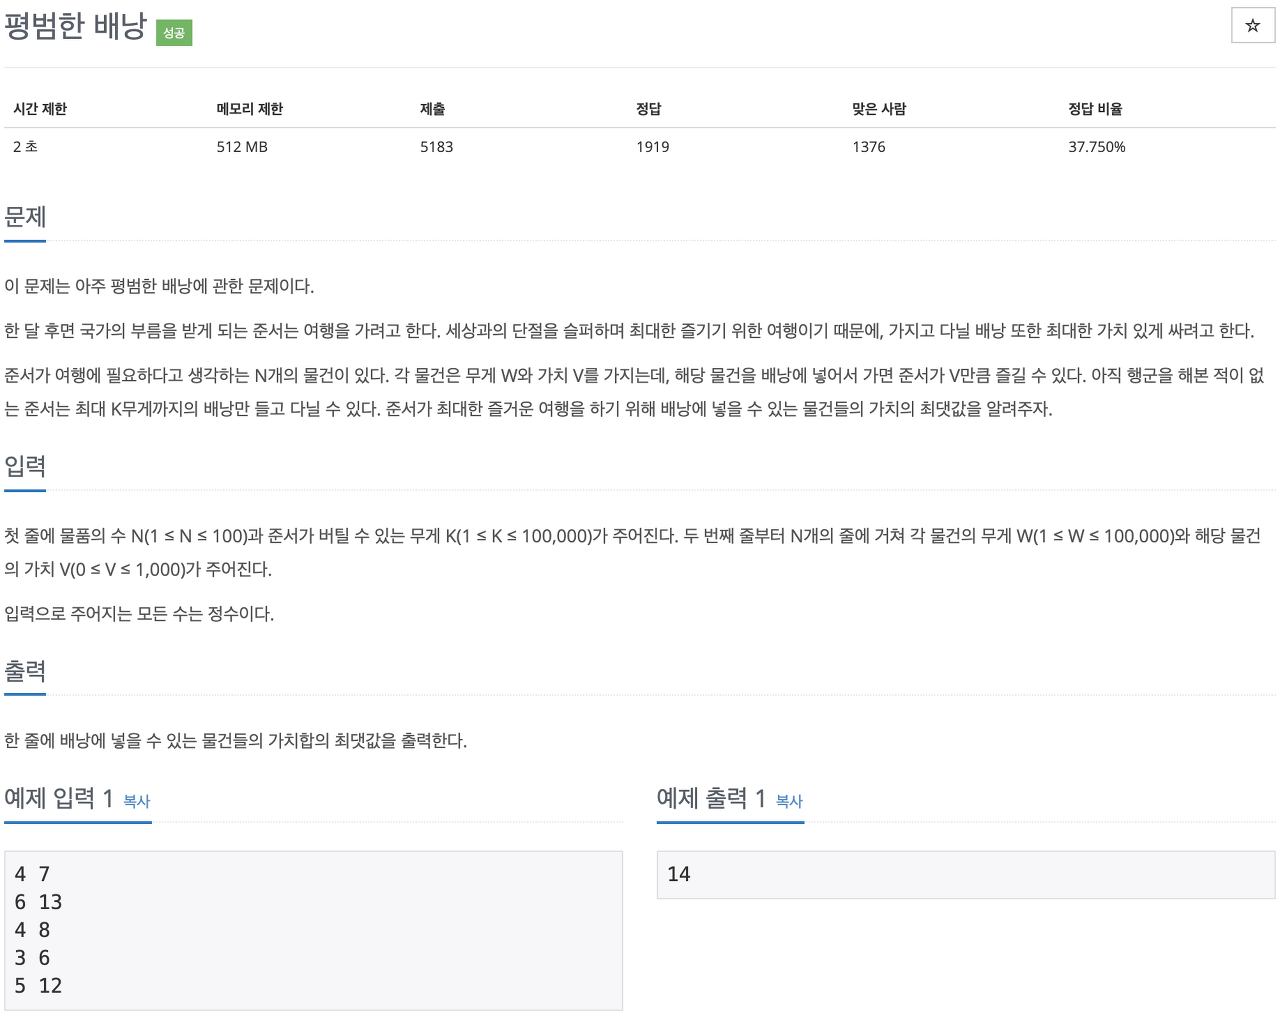

- 한 도둑이 훔치는 배낭에 담을 수 있는 무게의 최댓값이 정해져 있고, 일정 가치와 무게가 있는 짐들을 배낭에 넣을 때, 가치의 합이 최대가 되도록 짐을 고르는 방법을 찾는 문제이다. 이 문제를 냅색 문제(짐 싸기 문제)라고 부른다.

- 동적 계획법(dp)로 풀 수 있는 문제이다.



풀이

1) 우선 x축엔 가방 1~K 까지의 무게, y축은 물건 N개 개수 만큼의 배열을 만들어준다.

2) 행을 차례대로 돌며 다음을 수행한다.

3-0) 현재 물건이 현재 돌고있는 무게보다 작다면 바로 [이전 물건][현재 돌고있는 같은 배낭 무게] (knapsack[i-1][j])를 입력해준다.
-> 무슨 말이냐면, 현재 물건을 현재 배낭 무게에 넣어줄 수 없는 상태이면, 현재 물건에 대한 현재 배낭 무게에서의 가치의 최적값은 이전 물건에서의 최적값으로 대체가 가능하다는 소리다. 이 문제는 dp로 푼다는 것을 유념하자.

3-1) 현재 물건을 넣어준다. 물건을 넣은 뒤의 남은 무게를 채울 수 있는 최댓값(knapsack[i-1][j-weight])을 위의 행에서 가져와 더해준다.
-> 무슨 말이냐면, 일단 현재 물건을 넣어줘 본다는 것이다. 그리고 물건을 넣은 뒤 남은 배낭 무게를 채울 수 있는 최적값은 직전의 행에서 '현재 돌고 있는 배낭무게 - 현재 물건 무게'인 열에 해당하는 가치값이다. 직전의 행에서 구한 가치값들이 배낭 무게를 돌아가면서 이전의 물건들을 누적하며 계산한 최적값이기 때문이다. 다시 한번 말하지만, 이 문제는 dp로 푼다.

3-2) 현재 물건을 넣어주는 것보다, 다른 물건들로 채우는 값(knapsack[i-1][j])을 가져온다.
-> 무슨 말이냐면, 현재 물건을 넣지 않고, 이전의 물건이 현재 돌고 있는 같은 배낭 무게에서 갖는 '최적가치값'으로 현재 물건이 현재 돌고 있는 같은 배낭 무게에서 갖는 최적가치값을 대체한다는 것이다. 즉, 현재 물건을 넣어주는 것보다, 이전 계산된 최적가치값으로 현재 최적값을 저장하는게 더 낫다고 생각하는 경우다.

4) 3-1과 3-2 중 더 큰 값을 knapsack[i][j]에 저장해준다. 이 값은 현재까지의 물건들로 구성할 수 있는 가장 가치 높은 구성이다.
-> 핵심 포인트가 이 문장에서 나온다. 더 큰 값이란 곧 더 큰 가치값을 말한다. 그리고 저장된 값은 현재까지의 물건들로 구성할 수 있는 가장 가치 높은 구성이다. 즉 최적값이다.

5) knapsack[N][K]는 곧, K무게일 때의 최댓값을 가리킨다.
-> 다 돌고 나면, knapsack[N][K]이 곧 최적의(최대의) 가치값이다. 현재까지의 물건들로 구성할 수 있는 가장 가치 높은 구성을 지금까지 누적해가며 이루어 왔기 때문이다.

아래에 예제 1을 예시로 표를 나타내었다.

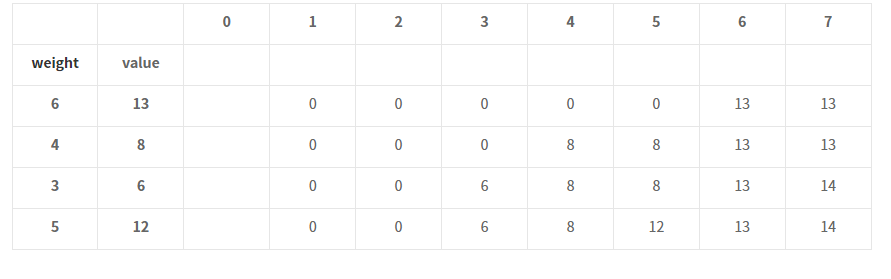

- 1행, 2행, 3행....이렇게 진행해가는 것이다.
- 아무 물건도 담을 수 없다면 가치가 0이므로, 이런 상황에서는 0으로 표에 표기한다.
- 위에서 설명한 규칙을 따른다.
- 위의 예제에서는, 표의 맨 마지막(마지막 행, 마지막 열)에 있는 14가 결국 답이 되는 것이다.

- 점화식

  : knapsack[i][j] = max(현재 물건 가치 + knapsack[이전 물건][현재 가방 무게 - 현재 물건 무게], knapsack[이전 물건][현재 가방 무게])

  : knapsack[i][j] = max(value + knapsack[i - 1][j - weight], knapsack[i - 1][j])

In [ ]:
# 코드

import sys 

N, K = map(int, input().split())
stuff = [[0,0]] # 빈 리스트대신, N+1 개의 행과 K+1개의 열을 갖는 행렬을 위해 다음과 같이 쓴다. 
knapsack = [[0 for _ in range(K + 1)] for _ in range(N + 1)] # N+1 개의 행과 K+1개의 열을 갖는 영(0)행렬을 만든다.

for _ in range(N):
    stuff.append(list(map(int, input().split()))) # 주어진 물품들의 [무게, 가치] 값들을 전부 stuff 에 넣어준다.


#냅색 문제 풀이
for i in range(1, N + 1): # 물건의 갯수만큼 반복
    for j in range(1, K + 1): # 배낭무게 1~K까지 돔. 총 NxK 만큼 계산
        weight = stuff[i][0] # i번째 [w,v]에서 w
        value = stuff[i][1] # i번째 [w,v]에서 v
       
        if j < weight:
            knapsack[i][j] = knapsack[i - 1][j] # 현재 물건 무게보다 현재 돌고있는 배낭 무게가 더 작으면 위의 값을 그대로 가져온다(3-0 규칙).
        else: # 현재 물건 무게보다 현재 돌고있는 배낭 무게가 더 크면(혹은 같다면)
            knapsack[i][j] = max(value + knapsack[i - 1][j - weight], knapsack[i - 1][j]) # 3-1규칙 vs 3-2 규칙에서 큰 것을 knapsack 행렬에서의 i행, j열에 해당하는 값으로 채택한다.

print(knapsack[N][K]) # 최종 출력